In [37]:
import pandas as pd 

In [154]:
df = pd.read_csv(r"I:\My Drive\Linear Regression Project\train.csv")

In [155]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [157]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [158]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [159]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [160]:
df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0])
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mode()[0])

In [161]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
df.Loan_Amount_Term.mean()

342.0

In [163]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

In [164]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [165]:
import numpy as np

In [166]:
#EDA

In [167]:
#import label encoder 
from sklearn import preprocessing
#label encoder knocwshow to understand the word label.
label_encoder = preprocessing.LabelEncoder()

Features_to_encod = []
print(df.columns)
for feature in df.columns:
    
    if type(feature) == int and float:
        pass
    if type(feature) != int and float:
        Features_to_encod.append(feature)
    else:
        pass
print(f"Features_to_encod={Features_to_encod}")

for x in Features_to_encod:
    df[x] = label_encoder.fit_transform(df[x])

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Features_to_encod=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [168]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [169]:
df["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [170]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

C:\Users\TEST\AppData\Local\Temp\ipykernel_22392\8736822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Loan_Status"])


<AxesSubplot: xlabel='Loan_Status', ylabel='Density'>

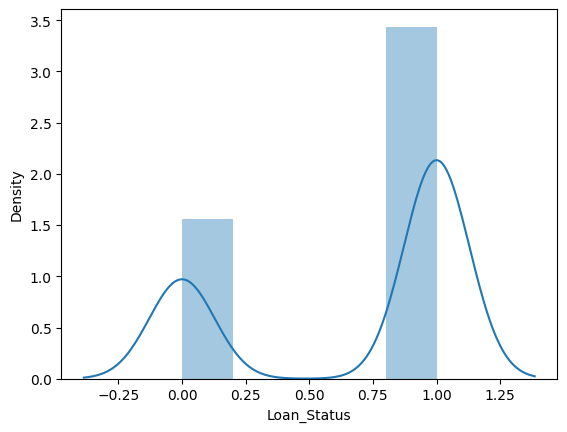

In [172]:
sns.distplot(df["Loan_Status"])

<AxesSubplot: ylabel='count'>

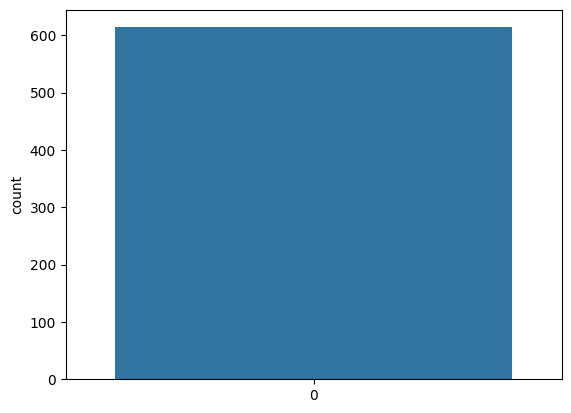

In [173]:
sns.countplot(df.Loan_Status)

In [174]:
from sklearn.utils import resample

df_Major = df[(df.Loan_Status == 1)]
df_Minor = df[(df.Loan_Status)==0]

df_Minor_Upsample = resample(df_Minor, replace = True, n_samples=422, random_state=1)

df_upsample = pd.concat([df_Minor_Upsample,df_Major])

In [175]:
df_upsample.Loan_Status.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

In [246]:
df = df_upsample.copy()

In [192]:
df.drop("Loan_ID", axis = 1 , inplace = True)

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
y = df.Loan_Status

In [195]:
y.dtype

dtype('int32')

In [196]:
x = df.drop(["Loan_Status"], axis =1)

In [197]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
108,1,1,2,0,0,243,226,149,9,0,2
450,1,1,2,1,0,63,38,78,9,0,0
218,1,1,2,0,0,338,0,30,9,0,1
447,1,1,0,0,0,211,45,17,9,1,0
423,1,1,1,0,0,417,78,63,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,174,113,61,9,1,0
609,0,0,0,0,0,125,0,29,9,1,0
610,1,1,3,0,0,275,0,7,5,1,0
611,1,1,1,0,0,431,3,163,9,1,2


In [198]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=20)

In [248]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
568,0,0,0,0,0,68,0,0,9,1,2
475,1,1,2,0,1,483,23,103,9,1,0
223,1,1,0,0,0,421,22,124,8,1,1
262,0,0,1,0,0,205,0,108,1,1,1
19,1,1,0,0,0,91,223,68,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
54,0,1,1,0,1,466,0,173,9,0,2
53,1,1,2,0,0,310,0,87,9,1,2
365,1,0,0,1,0,391,0,86,9,1,0
87,1,1,0,0,0,84,134,57,9,1,1


In [247]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.015527,-0.048783,0.009427,0.011299,0.034341,-0.032521,-0.065343,-0.061970,-0.027803,-0.018682,-0.121361,0.010960
Gender,-0.015527,1.000000,0.347112,0.159946,0.083082,-0.018999,0.048644,0.225696,0.147532,-0.061720,-0.004430,-0.014399,-0.003108
Married,-0.048783,0.347112,1.000000,0.324617,-0.001659,0.027908,0.024681,0.264302,0.212314,-0.085565,0.043859,0.007737,0.107999
Dependents,0.009427,0.159946,0.324617,1.000000,0.028574,0.069100,0.083671,0.000682,0.136616,-0.093700,-0.086410,0.013256,0.025004
Education,0.011299,0.083082,-0.001659,0.028574,1.000000,-0.003849,-0.200568,-0.059878,-0.159983,-0.110303,-0.066344,-0.042532,-0.084482
Self_Employed,0.034341,-0.018999,0.027908,0.069100,-0.003849,1.000000,0.195219,-0.019078,0.158677,-0.014248,-0.002693,-0.006892,0.036349
ApplicantIncome,-0.032521,0.048644,0.024681,0.083671,-0.200568,0.195219,1.000000,-0.208551,0.524315,0.022649,0.011588,-0.106468,-0.002134
CoapplicantIncome,-0.065343,0.225696,0.264302,0.000682,-0.059878,-0.019078,-0.208551,1.000000,0.308417,-0.051188,-0.000645,-0.053928,0.043447
LoanAmount,-0.061970,0.147532,0.212314,0.136616,-0.159983,0.158677,0.524315,0.308417,1.000000,0.063118,-0.005599,-0.063809,-0.048240
Loan_Amount_Term,-0.027803,-0.061720,-0.085565,-0.093700,-0.110303,-0.014248,0.022649,-0.051188,0.063118,1.000000,0.002933,-0.089457,-0.017934


In [201]:
# there are  11 colums in the data but corr is only for the 5 coluns 
# meanse we have to encode the feature text into the int label 

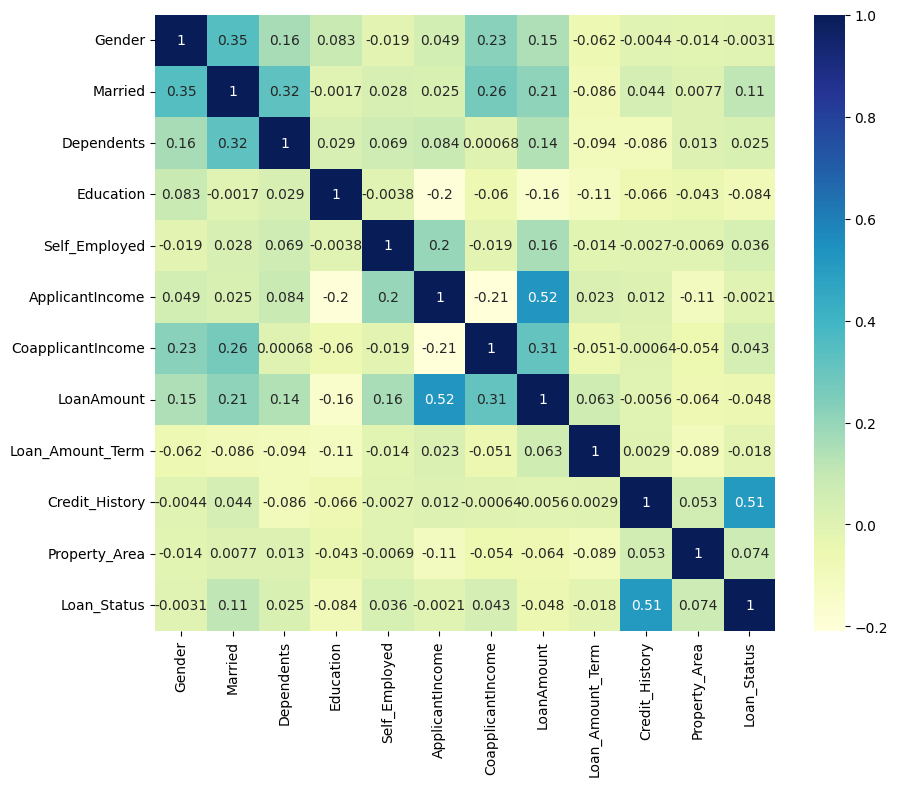

In [202]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [188]:
#Assumption chck 

In [189]:
# Linearity

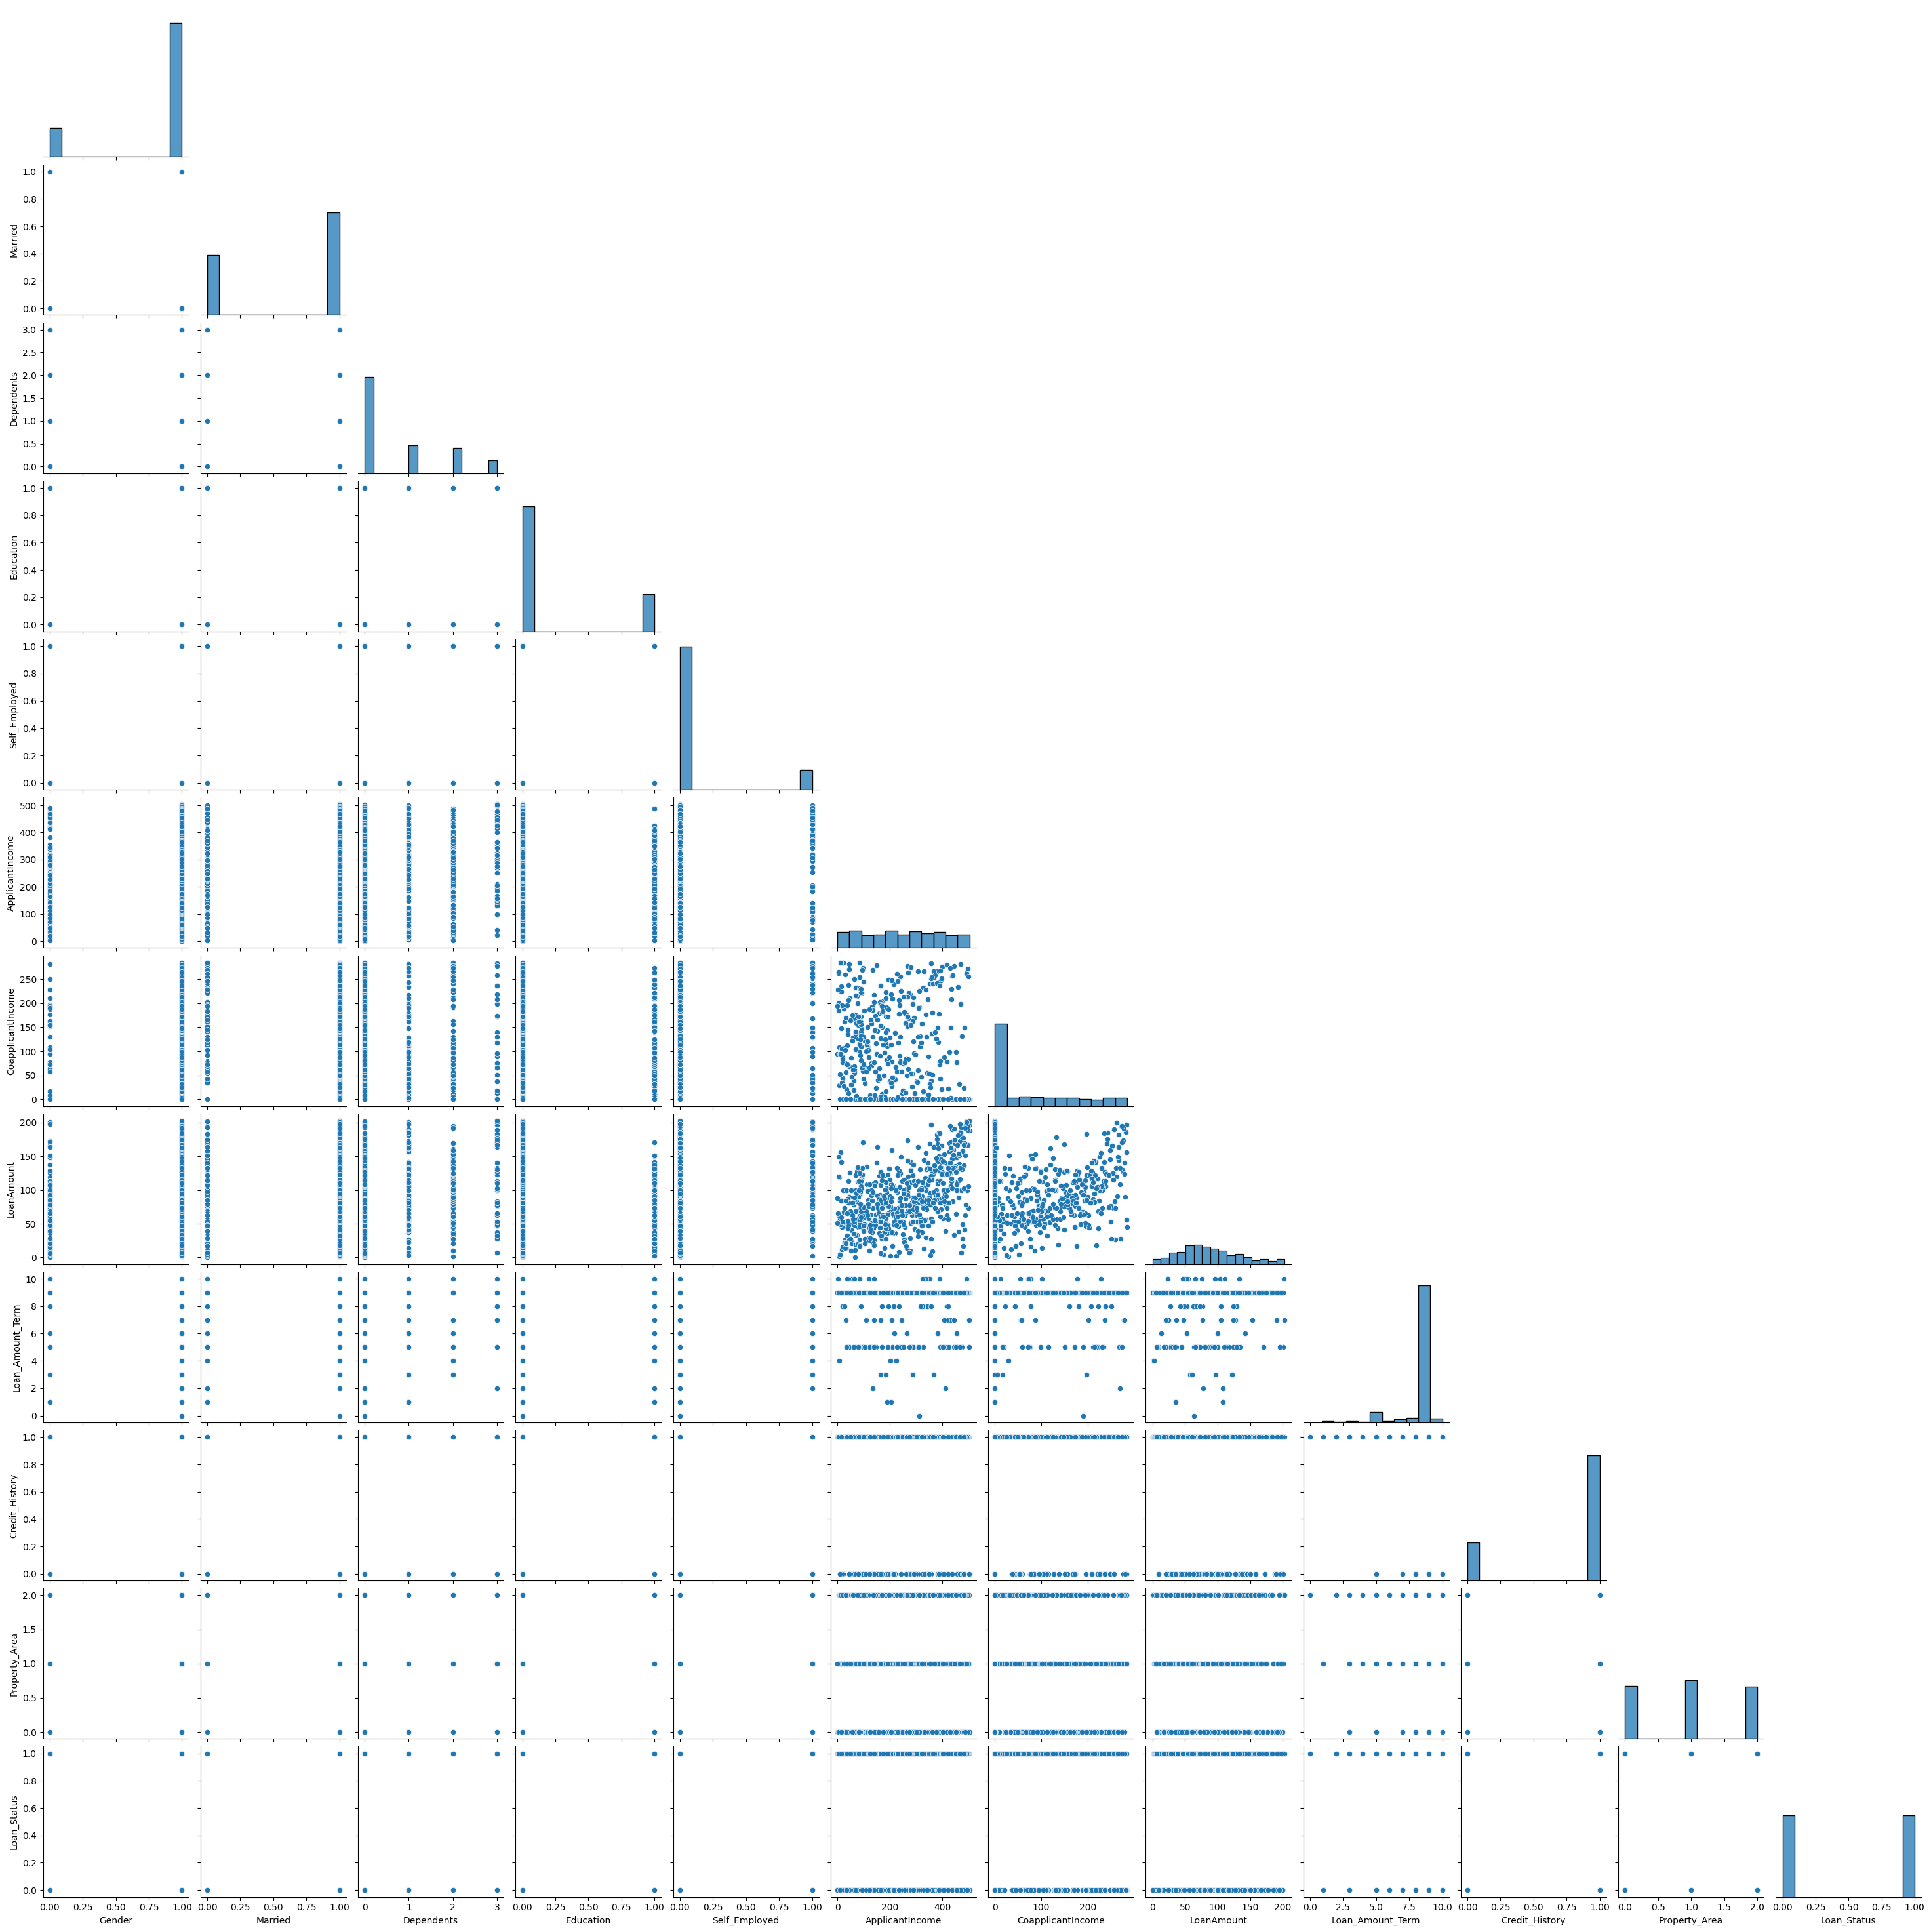

In [203]:
sns.pairplot(df, corner=True)

In [204]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [205]:
lr.fit(x_train,y_train)

LinearRegression()

In [206]:
lr.coef_

array([-2.91457026e-02,  1.23835641e-01,  3.06158002e-02, -8.49952819e-02,
        2.21040127e-02,  3.05471087e-04,  5.39695433e-04, -1.69279829e-03,
        4.91838100e-03,  6.05290595e-01,  3.24435126e-02])

In [207]:
# Model Evaluation 


In [208]:
y_pred_train = lr.predict(x_train)

In [209]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score as r2


In [210]:
print("mse=", mse(y_train,y_pred_train))

print("r2_score=", r2(y_train,y_pred_train))

mse= 0.1748860546228381
r2_score= 0.30038342817171626


In [211]:
lr.score(x_train,y_train)

0.30038342817171626

In [212]:
# model evaluation on test data

In [213]:
print("mse=", mse(y_test, lr.predict(x_test)))

print("r2_score=", r2(y_test, lr.predict(x_test)))

mse= 0.1886850211520764
r2_score= 0.2448385344511561


In [214]:
lr.score(x_test,y_test)

0.2448385344511561

In [215]:
residual = y_train - y_pred_train
residual

568   -0.678884
475    0.243152
223    0.353990
262   -0.496737
19     0.219076
         ...   
54    -0.078873
53    -0.761457
365   -0.452943
87     0.278152
449   -0.404779
Name: Loan_Status, Length: 590, dtype: float64

In [216]:
residual_test = y_test - lr.predict(x_test)

In [217]:
residual_test

140   -0.701105
515    0.214086
479   -0.722550
431    0.016594
370    0.234379
         ...   
258   -0.602936
195   -0.691627
578    0.298274
569   -0.169966
210   -0.513819
Name: Loan_Status, Length: 254, dtype: float64

In [218]:
# kde plot -- Kernal Density plot 

<AxesSubplot: xlabel='Loan_Status', ylabel='Density'>

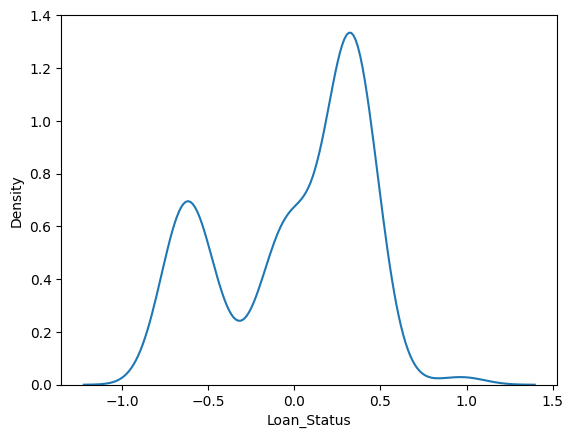

In [219]:
sns.kdeplot(residual)

<AxesSubplot: xlabel='Loan_Status', ylabel='Density'>

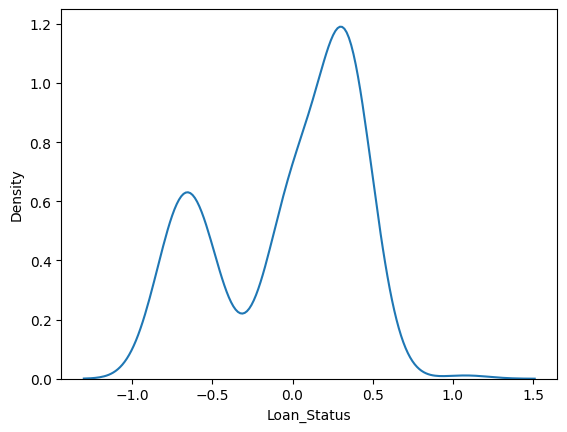

In [220]:
sns.kdeplot(residual_test)

<AxesSubplot: xlabel='Loan_Status', ylabel='Density'>

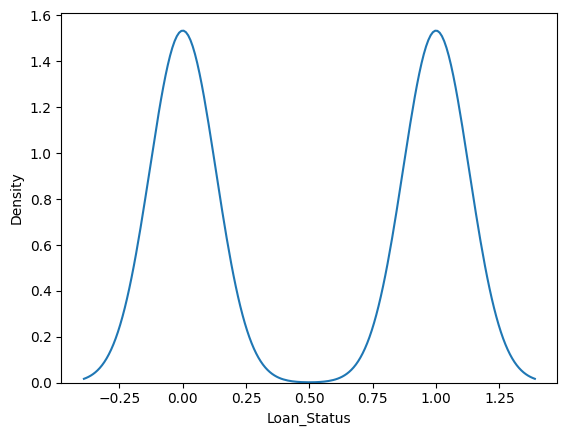

In [221]:
sns.kdeplot(df["Loan_Status"])

In [222]:
from scipy.stats import shapiro

In [223]:
stats, p = shapiro(residual)

In [224]:
stats, p

(0.8992012143135071, 2.9283620570933834e-19)

In [225]:
from scipy.stats import chisquare
stats, p = chisquare(residual_test)
stats, p

(-1658.9715370296408, 1.0)

In [226]:
# qq plot 

In [227]:
from scipy.stats import stats


In [228]:
import statsmodels.api as sm

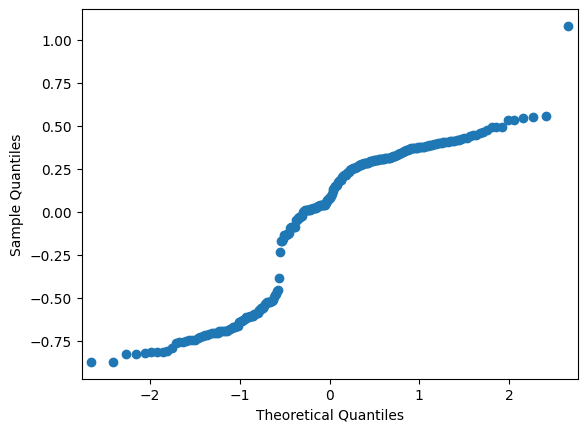

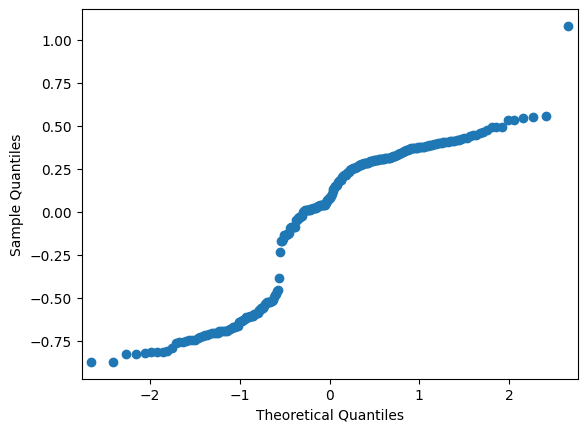

In [229]:
sm.qqplot(residual_test)

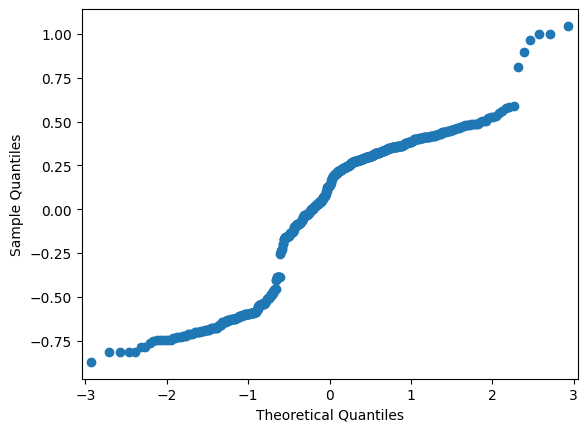

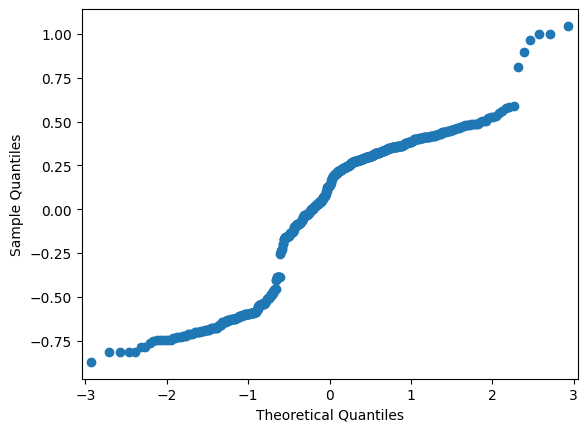

In [230]:
sm.qqplot(residual)

In [231]:
# Logistic regression 

In [233]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [234]:
lor.fit(x_train, y_train)

C:\Users\TEST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [249]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [253]:
x_sc_train = mms.fit_transform(x_train)
x_sc_test = mms.fit_transform(x_test)

In [254]:
lor.fit(x_sc_train,y_train)

LogisticRegression()

In [256]:
y_pred = lor.predict(x_sc_test)

In [279]:
y_pred_train = lor.predict(x_sc_train)

In [258]:
lor.score(x_sc_test,y_test)

0.7007874015748031

In [273]:
lor.score(x_sc_train, y_train)

0.7322033898305085

In [282]:
accuracy_score(y_pred_train, y_train)

0.7322033898305085

In [275]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score

In [283]:
confusion_matrix(y_test,y_pred)

array([[ 64,  66],
       [ 10, 114]], dtype=int64)

In [285]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.49      0.63       130
           1       0.63      0.92      0.75       124

    accuracy                           0.70       254
   macro avg       0.75      0.71      0.69       254
weighted avg       0.75      0.70      0.69       254



In [286]:
import pickle

In [287]:
with open("main.pkl","wb") as file:
    pickle.dump(lor,file)


In [288]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [291]:
for i in df.columns:
    print(type(df[i][0]))

<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'numpy.int32'>
